<a href="https://colab.research.google.com/github/wftutorial/python-random-quote/blob/master/LSMTMOEDAYAHOO10DIAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
#importar as bibliotecas
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas_datareader.data as web

In [77]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

In [78]:
df_acao = pd.DataFrame(yf.Ticker('AUDCAD=X').history(period = '5y'))

In [79]:
df_acao.reset_index(inplace=True, drop=False)
df_acao

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2017-01-11,0.974700,0.978300,0.974300,0.97477,0,0,0
1,2017-01-12,0.980180,0.986030,0.978010,0.98008,0,0,0
2,2017-01-13,0.984490,0.986110,0.980290,0.98459,0,0,0
3,2017-01-16,0.984540,0.984720,0.980200,0.98422,0,0,0
4,2017-01-17,0.984340,0.987480,0.982770,0.98443,0,0,0
...,...,...,...,...,...,...,...,...
1300,2022-01-05,0.919400,0.923850,0.918400,0.91960,0,0,0
1301,2022-01-06,0.921100,0.921362,0.911400,0.92132,0,0,0
1302,2022-01-07,0.911695,0.912070,0.907078,0.91171,0,0,0
1303,2022-01-10,0.907712,0.910070,0.906700,0.90779,0,0,0


In [80]:
#selecionar os campos
df_acao_fec = df_acao[['Date', 'Close']]
df_acao_fec

,Date,Close
0,2017-01-11,0.97477
1,2017-01-12,0.98008
2,2017-01-13,0.98459
3,2017-01-16,0.98422
4,2017-01-17,0.98443
...,...,...
1300,2022-01-05,0.91960
1301,2022-01-06,0.92132
1302,2022-01-07,0.91171
1303,2022-01-10,0.90779


In [81]:
#ajustar o index
df_acao_fec = df_acao_fec.set_index(pd.DatetimeIndex(df_acao_fec['Date'].values))

df_acao_fec

,Date,Close
2017-01-11,2017-01-11,0.97477
2017-01-12,2017-01-12,0.98008
2017-01-13,2017-01-13,0.98459
2017-01-16,2017-01-16,0.98422
2017-01-17,2017-01-17,0.98443
...,...,...
2022-01-05,2022-01-05,0.91960
2022-01-06,2022-01-06,0.92132
2022-01-07,2022-01-07,0.91171
2022-01-10,2022-01-10,0.90779


In [82]:
#retirar coluna
df_acao_fec.drop('Date', axis=1, inplace=True)
df_acao_fec

,Close
2017-01-11,0.97477
2017-01-12,0.98008
2017-01-13,0.98459
2017-01-16,0.98422
2017-01-17,0.98443
...,...
2022-01-05,0.91960
2022-01-06,0.92132
2022-01-07,0.91171
2022-01-10,0.90779


Text(0.5, 0, 'data')

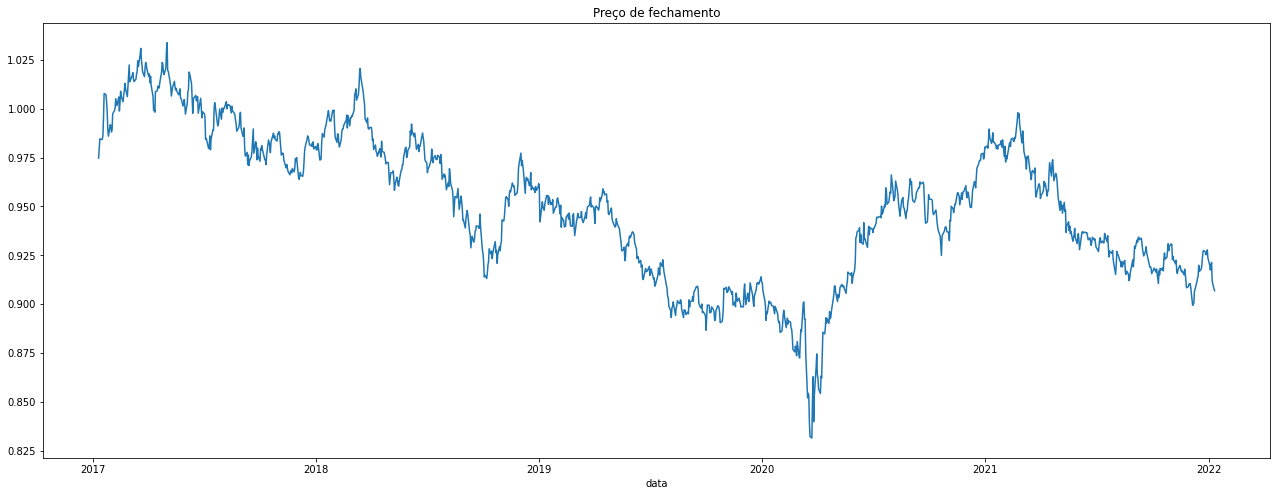

In [83]:
#plotar informação
plt.figure(figsize=(22,8))
plt.title('Preço de fechamento')
plt.plot(df_acao_fec['Close'])
plt.xlabel('data')

In [84]:
#verificar a quantidade de linhas
qtd_linhas = len(df_acao_fec)

qtd_linhas_treino = round(.70 * qtd_linhas)

qtd_linhas_teste = qtd_linhas - qtd_linhas_treino

info = (
    f"linhas treino= 0:{qtd_linhas_treino}"
    f" linhas teste= {qtd_linhas_treino}:{qtd_linhas_treino + qtd_linhas_teste}"

)

info

'linhas treino= 0:913 linhas teste= 913:1305'

In [85]:
#Normalizando os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_acao_fec)

In [86]:
#separa em treino e teste
train = df_scaled[:qtd_linhas_treino]
test = df_scaled[qtd_linhas_treino: qtd_linhas_treino+qtd_linhas_teste]

print( len(train), len(test))

913 392


In [87]:
# convert an array of values into a df matrix
def create_df(df, steps=1):
    dataX, dataY = [], []
    for i in range(len(df)-steps-1):
        a = df[i:(i+steps), 0]
        dataX.append(a)
        dataY.append(df[i + steps, 0])
    return np.array(dataX), np.array(dataY)

In [88]:
#gerandoi dados de treino e teste
steps = 15
X_train, Y_train = create_df(train, steps)
X_test, Y_test = create_df(test, steps)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(897, 15)
(897,)
(376, 15)
(376,)


In [89]:
#gerando os dados que o modelo espera
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [90]:
#montando a rede
model = Sequential()
model.add(LSTM(35, return_sequences=True, input_shape=(steps, 1)))
model.add(LSTM(35, return_sequences=True))
model.add(LSTM(35))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 15, 35)            5180      
                                                                 
 lstm_10 (LSTM)              (None, 15, 35)            9940      
                                                                 
 lstm_11 (LSTM)              (None, 35)                9940      
                                                                 
 dropout_3 (Dropout)         (None, 35)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 36        
                                                                 
Total params: 25,096
Trainable params: 25,096
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
60/60 - 9s - loss: 0.2704 - val_loss: 0.0598 - 9s/epoch - 151ms/step
Epoch 2/100
60/60 - 1s - loss: 0.0932 - val_loss: 0.0524 - 1s/epoch - 24ms/step
Epoch 3/100
60/60 - 2s - loss: 0.0842 - val_loss: 0.0451 - 2s/epoch - 25ms/step
Epoch 4/100
60/60 - 1s - loss: 0.0744 - val_loss: 0.0533 - 1s/epoch - 25ms/step
Epoch 5/100
60/60 - 1s - loss: 0.0723 - val_loss: 0.0405 - 1s/epoch - 25ms/step
Epoch 6/100
60/60 - 1s - loss: 0.0713 - val_loss: 0.0389 - 1s/epoch - 24ms/step
Epoch 7/100
60/60 - 1s - loss: 0.0742 - val_loss: 0.0392 - 1s/epoch - 24ms/step
Epoch 8/100
60/60 - 1s - loss: 0.0620 - val_loss: 0.0329 - 1s/epoch - 24ms/step
Epoch 9/100
60/60 - 1s - loss: 0.0629 - val_loss: 0.0342 - 1s/epoch - 24ms/step
Epoch 10/100
60/60 - 1s - loss: 0.0628 - val_loss: 0.0341 - 1s/epoch - 24ms/step
Epoch 11/100
60/60 - 1s - loss: 0.0582 - val_loss: 0.0281 - 1s/epoch - 24ms/step
Epoch 12/100
60/60 - 1s - loss: 0.0563 - val_loss: 0.0273 - 1s/epoch - 24ms/step
Epoch 13/100
60/60 - 1s - loss: 0.05

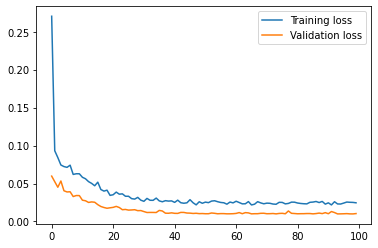

In [91]:
#Treinamento do modelo
validation = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=15, verbose=2)

plt.plot(validation.history['loss'], label='Training loss')
plt.plot(validation.history['val_loss'], label='Validation loss')
plt.legend()

In [92]:
#Fazendo a previsão
prev= model.predict(X_test)
prev = scaler.inverse_transform(prev)
prev

array([[0.96507466],
       [0.95889324],
       [0.95357877],
       [0.9538989 ],
       [0.9547152 ],
       [0.9620671 ],
       [0.9592506 ],
       [0.95610106],
       [0.951416  ],
       [0.9485341 ],
       [0.9452436 ],
       [0.95206684],
       [0.9541115 ],
       [0.9550389 ],
       [0.95056105],
       [0.94930655],
       [0.9443083 ],
       [0.94692963],
       [0.94770896],
       [0.95160687],
       [0.95394045],
       [0.96297854],
       [0.96231407],
       [0.962925  ],
       [0.9572251 ],
       [0.953149  ],
       [0.9519019 ],
       [0.9530886 ],
       [0.9540379 ],
       [0.95691663],
       [0.9580279 ],
       [0.9598779 ],
       [0.95999354],
       [0.9624918 ],
       [0.9620719 ],
       [0.96190697],
       [0.96252304],
       [0.96164227],
       [0.9548958 ],
       [0.94682187],
       [0.9415096 ],
       [0.9416059 ],
       [0.94698703],
       [0.9553223 ],
       [0.9548424 ],
       [0.95451975],
       [0.95393324],
       [0.953

In [93]:
#previsão para os proximos 10 dias
lenght_test = len(test)
lenght_test

392

In [94]:
#pegar os ultimos dias que são o tamnho do meu step
days_input_steps = lenght_test - steps
days_input_steps

377

In [95]:
#transforma em array
input_steps = test[days_input_steps:]
input_steps = np.array(input_steps).reshape(1,-1)
input_steps

array([[-0.7147549 , -0.62847033, -0.60980758, -0.63647648, -0.67066626,
        -0.64226586, -0.60250434, -0.71529499, -0.81402086, -0.88083014,
        -0.82348765, -0.7769646 , -1.03689688, -1.14292598, -1.16835188]])

In [96]:
#tranformar em lista
list_output_steps = list(input_steps)
list_output_steps = list_output_steps[0].tolist()
list_output_steps

[-0.7147549015111966,
 -0.628470326301424,
 -0.6098075788681593,
 -0.6364764772822111,
 -0.6706662565511508,
 -0.6422658627377099,
 -0.6025043440830271,
 -0.7152949862028123,
 -0.8140208556370584,
 -0.8808301380864787,
 -0.823487653574872,
 -0.7769645970197822,
 -1.0368968798392222,
 -1.1429259840586004,
 -1.1683518815853815]

In [97]:
#loop para prever os proximos 10 dias
pred_output=[]
i=0
n_future=10
while(i<n_future):
    
    if(len(list_output_steps) > steps):
        
        input_steps = np.array(list_output_steps[1:])
        print("{} dia. Valores de entrada -> {}".format(i,input_steps))
        input_steps = input_steps.reshape(1,-1)
        input_steps = input_steps.reshape((1, steps, 1))
        #print(input_steps)
        pred = model.predict(input_steps, verbose=0)
        print("{} dia. Valor previsto -> {}".format(i,pred))
        list_output_steps.extend(pred[0].tolist())
        list_output_steps=list_output_steps[1:]
        #print(list_output_steps)
        pred_output.extend(pred.tolist())
        i=i+1
    else:       
        input_steps = input_steps.reshape((1, steps,1))
        pred = model.predict(input_steps, verbose=0)
        print(pred[0])
        list_output_steps.extend(pred[0].tolist())
        print(len(list_output_steps))
        pred_output.extend(pred.tolist())
        i=i+1
    

print(pred_output)

[-1.2161207]
16
1 dia. Valores de entrada -> [-0.62847033 -0.60980758 -0.63647648 -0.67066626 -0.64226586 -0.60250434
 -0.71529499 -0.81402086 -0.88083014 -0.82348765 -0.7769646  -1.03689688
 -1.14292598 -1.16835188 -1.21612072]
1 dia. Valor previsto -> [[-1.2641037]]
2 dia. Valores de entrada -> [-0.60980758 -0.63647648 -0.67066626 -0.64226586 -0.60250434 -0.71529499
 -0.81402086 -0.88083014 -0.82348765 -0.7769646  -1.03689688 -1.14292598
 -1.16835188 -1.21612072 -1.26410365]
2 dia. Valor previsto -> [[-1.3085096]]
3 dia. Valores de entrada -> [-0.63647648 -0.67066626 -0.64226586 -0.60250434 -0.71529499 -0.81402086
 -0.88083014 -0.82348765 -0.7769646  -1.03689688 -1.14292598 -1.16835188
 -1.21612072 -1.26410365 -1.30850959]
3 dia. Valor previsto -> [[-1.3532131]]
4 dia. Valores de entrada -> [-0.67066626 -0.64226586 -0.60250434 -0.71529499 -0.81402086 -0.88083014
 -0.82348765 -0.7769646  -1.03689688 -1.14292598 -1.16835188 -1.21612072
 -1.26410365 -1.30850959 -1.35321307]
4 dia. Valor

In [98]:
#Tranforma a saida
prev = scaler.inverse_transform(pred_output)
prev = np.array(prev).reshape(1,-1)
list_output_prev = list(prev)
list_output_prev = prev[0].tolist()
list_output_prev

[0.9050839111264811,
 0.9033099266396298,
 0.9016681877578876,
 0.9000154482419271,
 0.898290521471215,
 0.8964508593196521,
 0.8944686164318737,
 0.8923303813776208,
 0.8900392965656265,
 0.887606137857535]

In [99]:
#pegar as data de previsao
dates = pd.to_datetime(df_acao['Date'])
predict_dates = pd.date_range(list(dates)[-1] + pd.DateOffset(1), periods=10, freq='b').tolist()
predict_dates

[Timestamp('2022-01-12 00:00:00', freq='B'),
 Timestamp('2022-01-13 00:00:00', freq='B'),
 Timestamp('2022-01-14 00:00:00', freq='B'),
 Timestamp('2022-01-17 00:00:00', freq='B'),
 Timestamp('2022-01-18 00:00:00', freq='B'),
 Timestamp('2022-01-19 00:00:00', freq='B'),
 Timestamp('2022-01-20 00:00:00', freq='B'),
 Timestamp('2022-01-21 00:00:00', freq='B'),
 Timestamp('2022-01-24 00:00:00', freq='B'),
 Timestamp('2022-01-25 00:00:00', freq='B')]

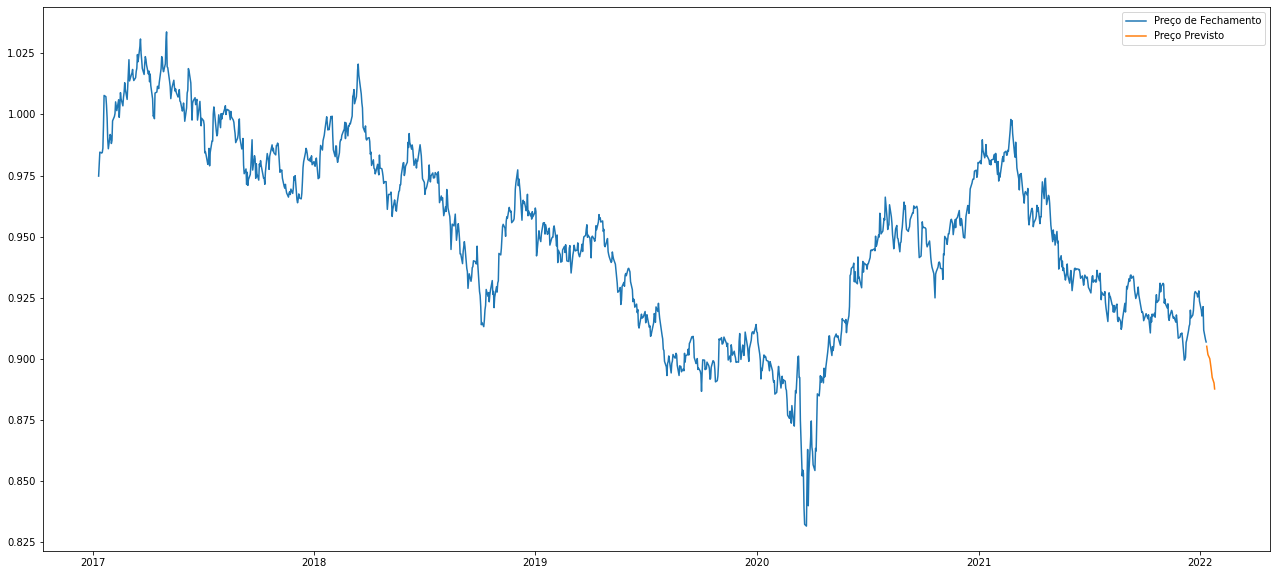

In [100]:
#cria dataframe de previsao

forecast_dates = []
for i in predict_dates:
  forecast_dates.append(i.date())


df_forecast = pd.DataFrame({'Date': np.array(forecast_dates), 'Close': list_output_prev})
df_forecast['Date'] = pd.to_datetime(df_forecast['Date'])

df_forecast=df_forecast.set_index(pd.DatetimeIndex(df_forecast['Date'].values))
df_forecast.drop('Date',axis=1,inplace=True)
df_forecast

df_acao_fec = df_acao[['Date', 'Close']]
df_acao_fec=df_acao_fec.set_index(pd.DatetimeIndex(df_acao_fec['Date'].values))
df_acao_fec.drop('Date',axis=1,inplace=True)
df_acao_fec

#plotar o grafico
plt.figure(figsize=(22,10))
plt.plot(df_acao_fec['Close'])
plt.plot(df_forecast['Close'])
plt.legend(['Preço de Fechamento', 'Preço Previsto'])
plt.show()